In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(123)

data = pd.read_csv('train.csv')
data = data.iloc[:,1::]
#data = data.drop(["GarageYrBlt","FireplaceQu","PoolQC","Fence"],axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [134]:
#data = data.fillna({"GarageType": "Attchd"})
#data["GarageType"].value_counts()
data["GarageYrBlt"].value_counts()
#data["GarageFinish"].value_counts()
#data["GarageCond"].value_counts()
#data.info()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
          ..
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3
1921.0     3
1924.0     3
1910.0     3
1952.0     3
1932.0     3
2010.0     3
1923.0     3
1937.0     2
1934.0     2
1918.0     2
1947.0     2
1929.0     2
1914.0     2
1915.0     2
1942.0     2
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

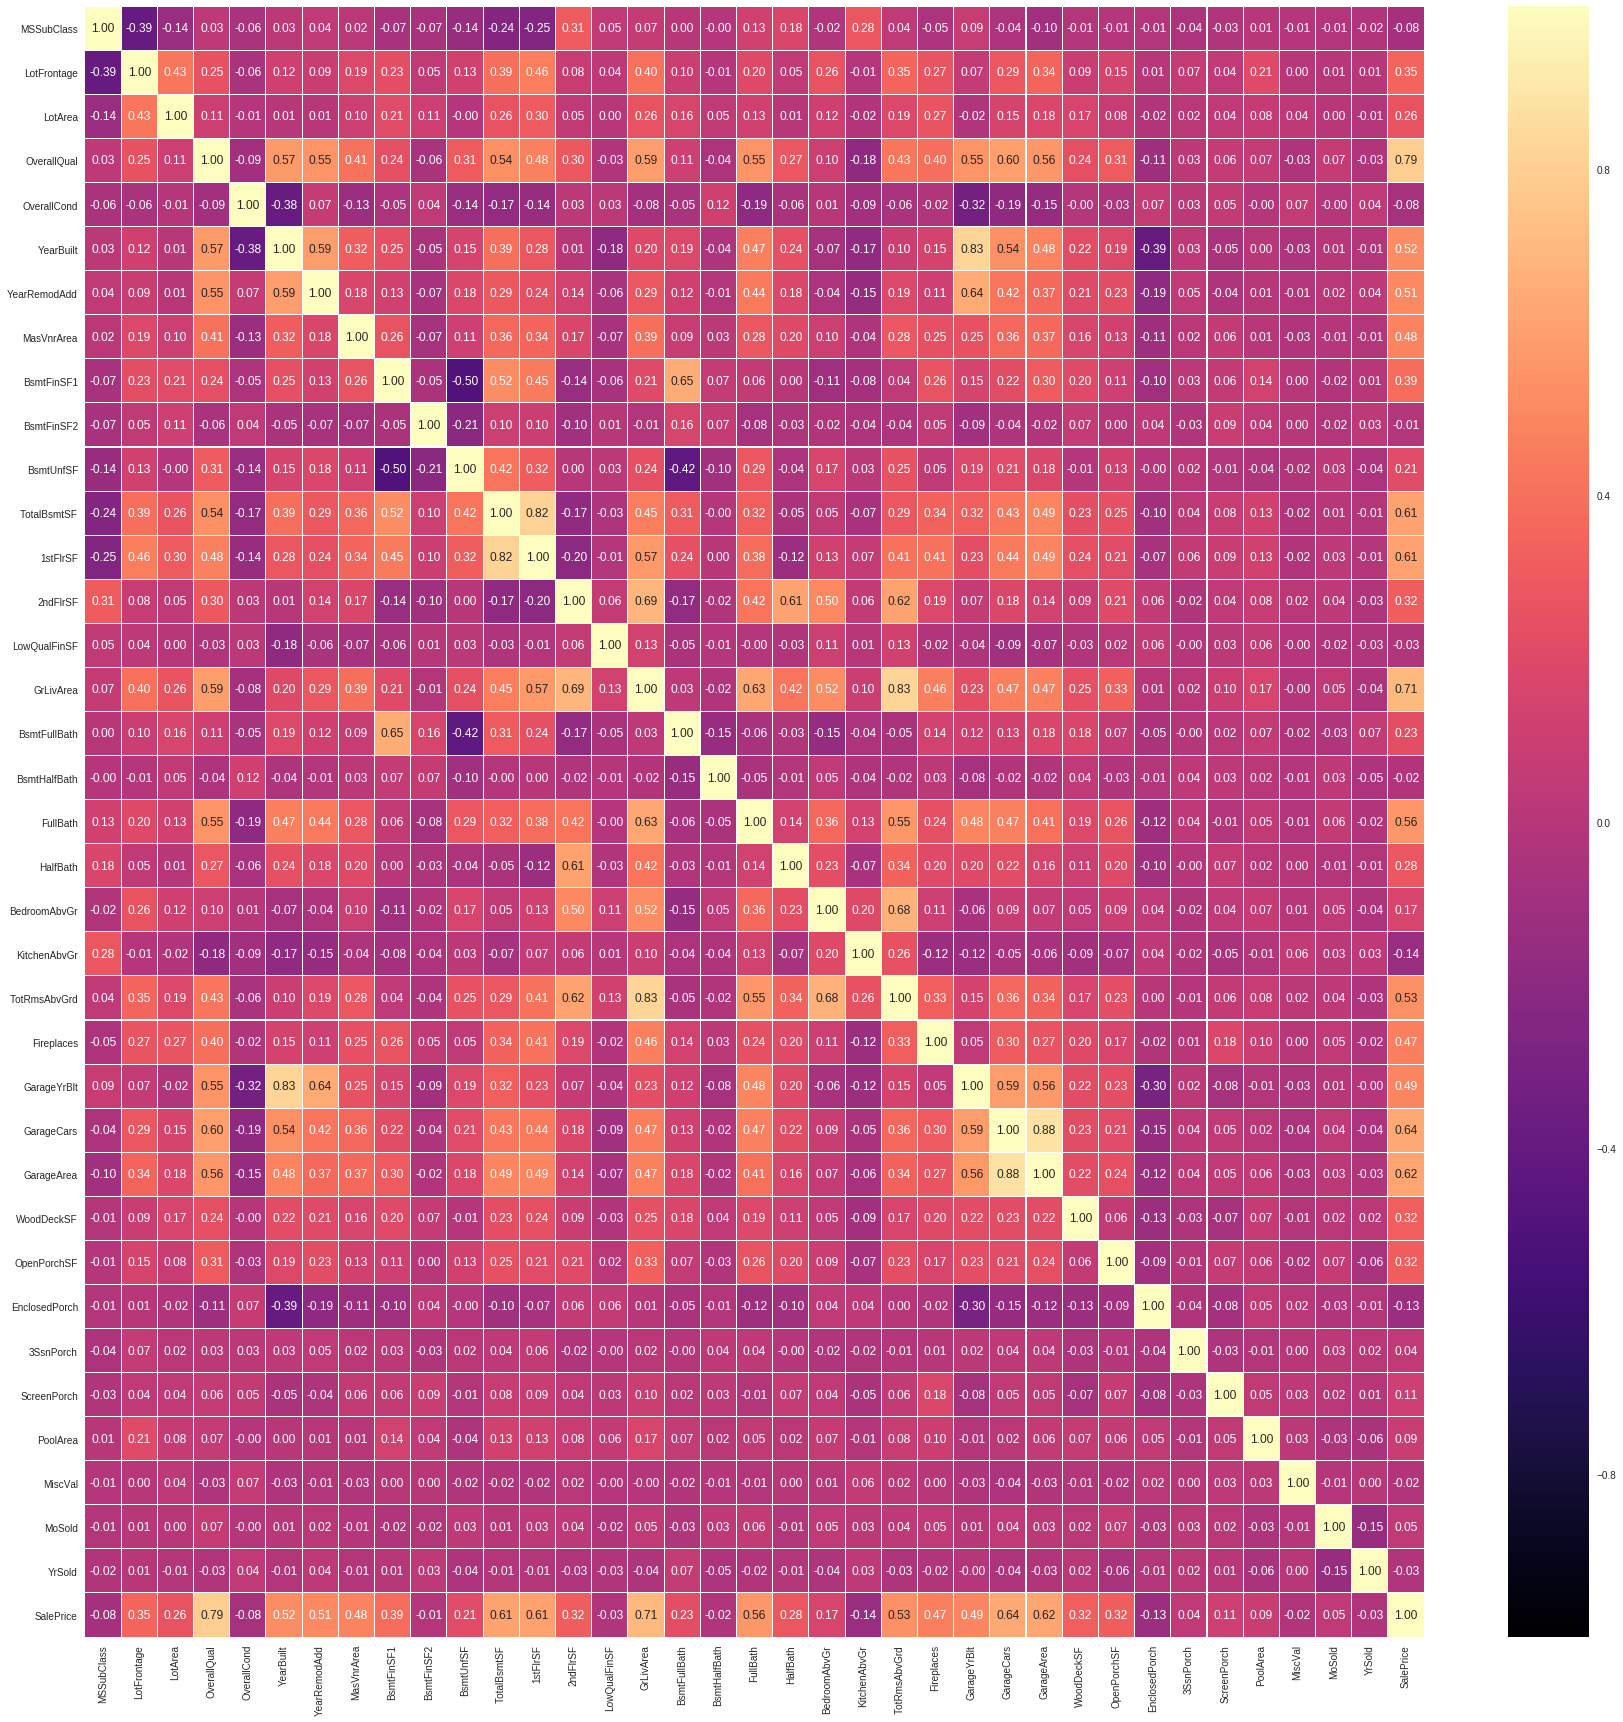

In [122]:
corr = data.corr()
fig,ax=plt.subplots(figsize=(30,30))
sns.heatmap(corr,ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap="magma")
plt.show()

In [97]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False

selected_columns = data.columns[columns]

data = data[selected_columns]
print(selected_columns)
len(selected_columns)

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition2', u'BldgType',
       u'HouseStyle', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'RoofStyle', u'RoofMatl', u'Exterior2nd',
       u'MasVnrArea', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF'],
      dtype='object')


33